## Application of causal discovery and causal inference methods to climate dynamics problem
##### Here, this notebook shows and explains step by step a causal approach to analyse linkages among ENSO, circulation fields, and summer monsoon precipitation over the Himalayas.

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

from src.DataProcessingClass import DataProcessingClass
from src.Causality import Causality

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Preprocessing of climate indices (or time series data): 
#### ENSO - El Niño–Southern Oscillation
#### WC - Walker cell
#### MHC - Monsoon Hadley cell
#### Himalayan precipitation

In [2]:
# Create a class instance for data preprocessing
dpc = DataProcessingClass()

# Load climate indices from netCDF files.
D = dpc.load_netcdf_files()

Input dir path: data/
Selected indices:  ['enso', 'mhc', 'precip', 'wc']
['enso.nc', 'mhc.nc', 'precip.nc', 'wc.nc']
enso
mhc
precip
wc
List of files
enso.nc
mhc.nc
precip.nc
wc.nc


#### Plot the location of the WC/HP and MHC indices

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    orog       (time, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.5


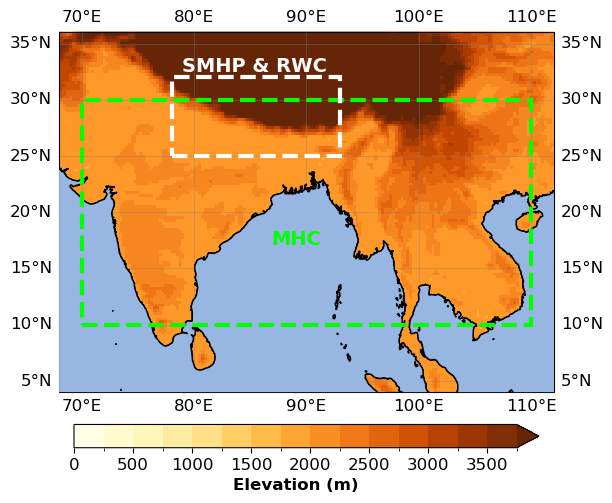

In [3]:
dpc.plot_orography_map(fn='new_indices_map_orography', save=True)

#### Transfrom precipitation data with logarithmic function

In [4]:
# Apply log transform
ind_name='precip'
if ind_name in list(D.keys()): dpc.transform_precip(D, ind_name=ind_name, apply_transform=True)

#### Apply ADF and KPSS statistical tests to indices to check for the stationarity 

In [5]:
# Use the Augmented Dickey-Fuller unit root test and Kwiatkowski-Phillips-Schmidt-Shin test for stationarity
dpc.adf_kpss_tests(D)

Index: enso
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) in

/Users/muszynski/Desktop/code/causal_project/causality/causality_project/project_causal_climate_dynamics/src/DataProcessingClass.py:197: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  dftest2 = kpss(D[k].variables[k].values, nlags='legacy', store=True)
/Users/muszynski/Desktop/code/causal_project/causality/causality_project/project_causal_climate_dynamics/src/DataProcessingClass.py:197: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  dftest2 = kpss(D[k].variables[k].values, nlags='legacy', store=True)
/Users/muszynski/Desktop/code/causal_project/causality/causality_project/project_causal_climate_dynamics/src/DataProcessingClass.py:197: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The 

#### 1) Based on the result of statitiscal test perform detrending of WC index
#### 2) Remove climatological and seasonal cycles
#### 3) Normalise indices to a common range
#### 4) Select datapoint from climate indices from a specified timeframe of our interest

In [6]:
# Select index
ind_name = 'wc'

if ind_name in list(D.keys()): dpc.detrend_index(D, ind_name)

# Remove means
dpc.remove_means(D)

# Apply min max normalisation
dpc.min_max_norm(D)

# Select datapoint for May-September from each year for 1940-2022
dpc.select_datapoints(D)


#### Calculate lagged cross-correlations for all pairs of climate indices

In [7]:
# Choose max lag time
n_lags = -2

dpc.test_pairs_lag_corr(D, n_lags)

Pair: enso-->mhc
Computing lagged cross-correlations at lags: [ 0 -1 -2]
0 PearsonRResult(statistic=-0.16745723919992023, pvalue=0.0006141410463767058)
-1 PearsonRResult(statistic=-0.1222119742054426, pvalue=0.012829700722353824)
-2 PearsonRResult(statistic=0.0393378912173375, pvalue=0.42526167333527004)


Pair: enso-->precip
Computing lagged cross-correlations at lags: [ 0 -1 -2]
0 PearsonRResult(statistic=-0.12025727692182964, pvalue=0.014232547925401897)
-1 PearsonRResult(statistic=-0.1513678594610773, pvalue=0.0020124964048179226)
-2 PearsonRResult(statistic=0.023379627040393945, pvalue=0.6356747156733551)


Pair: enso-->wc
Computing lagged cross-correlations at lags: [ 0 -1 -2]
0 PearsonRResult(statistic=0.1626829314575314, pvalue=0.0008800962242277039)
-1 PearsonRResult(statistic=0.13397710590019138, pvalue=0.006331374959451893)
-2 PearsonRResult(statistic=0.029535247750799864, pvalue=0.5494806457717369)


Pair: mhc-->enso
Computing lagged cross-correlations at lags: [ 0 -1 -2]
0

#### Build a causal graph using PCMCI algorithm.

In [8]:
# Create a class instance with climate indices
ca = Causality(D)

# Construct a custom dataframe format used by Tigramite package
dataframe, _ = ca.generate_dataframe(D) 

# Build the causal graph with PCMCI algorithm
sig_causal_parents = ca.construct_causal_graph(dataframe)

matched_indexes ['enso' 'mhc' 'precip' 'wc']
var_names ['enso', 'mhc', 'precip', 'wc']
{'precip': 'SMHP', 'wc': 'RWC', 'mhc': 'MHC', 'enso': 'ENSO'}
matched_labels ['ENSO', 'MHC', 'SMHP', 'RWC']
Input Indices: (415, 4)
print_significant_links()

## Significant links at alpha = 0.05:

    Variable ENSO has 1 link(s):
        (ENSO -1): pval = 0.04069 | val =  0.108

    Variable MHC has 4 link(s):
        (RWC -1): pval = 0.00028 | val = -0.199
        (SMHP -1): pval = 0.01011 | val = -0.146
        (MHC -1): pval = 0.02276 | val =  0.125
        (ENSO -1): pval = 0.03332 | val = -0.116

    Variable SMHP has 4 link(s):
        (SMHP -1): pval = 0.00000 | val = -0.253
        (RWC -1): pval = 0.00018 | val = -0.208
        (ENSO -1): pval = 0.00818 | val = -0.152
        (MHC -1): pval = 0.01404 | val =  0.136

    Variable RWC has 2 link(s):
        (MHC -1): pval = 0.01121 | val = -0.141
        (ENSO -1): pval = 0.03673 | val =  0.112
{0: [(0, -1)], 1: [(3, -1), (2, -1), (1, -1), (0

#### Use linear estimator to compute beta coefficients on the build causal graph

In [9]:
# Fit the linear estimator
val_matrix = ca.linear_estimator(sig_causal_parents, dataframe)

# Get the beta coefficients for the causal graph
ca.get_links_beta_coeffs()


### Beta coefficients for:

0 enso
1 mhc
2 precip
3 wc
             0         1         2         3
0 -1  0.099544 -0.101272 -0.228910  0.135563
3 -1       NaN -0.152649 -0.263894       NaN
2 -1       NaN -0.125666 -0.286712       NaN
1 -1       NaN  0.128466  0.269170 -0.135812


#### Plot the causal graph a causal effect network 

plots/paper/cenENSO_MHC_SMHP_RWC
[[ 0.          0.          0.          0.        ]
 [ 0.09954373  0.12846641 -0.28671235  0.        ]]
Main diag vals: 
[[ 0.          0.09954373]
 [ 0.          0.12846641]
 [ 0.         -0.28671235]
 [ 0.          0.        ]]
Original: [[[ 0.          0.09954373]
  [ 0.         -0.10127236]
  [ 0.         -0.22890981]
  [ 0.          0.13556293]]

 [[ 0.          0.        ]
  [ 0.          0.12846641]
  [ 0.          0.26916999]
  [ 0.         -0.13581198]]

 [[ 0.          0.        ]
  [ 0.         -0.12566618]
  [ 0.         -0.28671235]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.         -0.1526493 ]
  [ 0.         -0.26389399]
  [ 0.          0.        ]]]
Non-negative autocorr path coeffs: [[[ 0.          0.09954373]
  [ 0.         -0.10127236]
  [ 0.         -0.22890981]
  [ 0.          0.13556293]]

 [[ 0.          0.        ]
  [ 0.          0.12846641]
  [ 0.          0.26916999]
  [ 0.         -0.13581198]]

 [[ 0.   

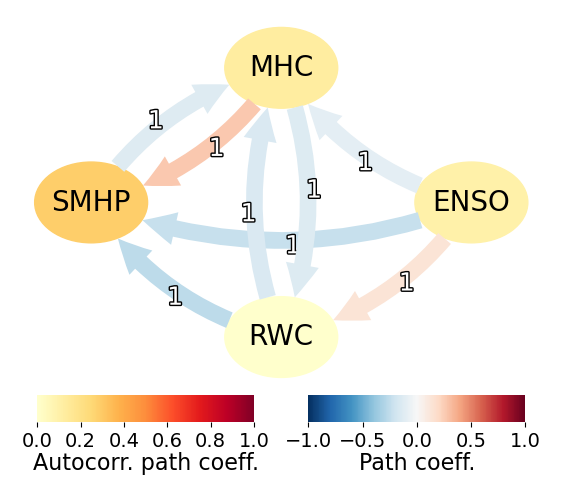

In [10]:
# Plot causal effect network and save it to a png format
ca.plot_cens_graph(val_matrix, save=True)

#### Apply bootstrapping to estimate the statisical robustness of the causal links

In [11]:
# Run bootstrap procedure, compute the aggregated causal metrics: average causal effect and average causal susceptiblity.
# Save the results of the procedure to a npz file
# Create a class instance with climate indices
ca_boot = Causality(D)
ca_boot.bootrstapping()

Sample size: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410]
Selected samples/years: [185 170 370  10 110 115 235  35 295 295  25  20 125 345  55 230  35  80
  55 155 325 325 115 125  55  80   5  90  55  85 305 115  40 205 275   5
 305 245 285 275]
ITERATION 
0
Selected months: [185, 186, 187, 188, 189]
matched_indexes ['enso' 'mhc' 'precip' 'wc']
var_names ['enso', 'mhc', 'precip', 'wc']
{'precip': 'SMHP', 'wc': 'RWC', 'mhc': 'MHC', 'enso': 'ENSO'}
matched_labels ['ENSO', 'MHC', 'SMHP', 'RWC']
Input Indices: (415, 4)
bootstrap - reduced input:  (410, 4)
print_significant_links()

## Significant links at alpha = 0.05:

    Variable ENSO has 0 lin

mean value:
MHC
 ↑ 
ENSO
-0.10158324410277625
mean value:
MHC
 ↑ 
SMHP
-0.12166841832482134
mean value:
MHC
 ↑ 
RWC
-0.1525891821480016
mean value:
SMHP
 ↑ 
ENSO
-0.23044467419725195
mean value:
SMHP
 ↑ 
MHC
0.267245522130484
mean value:
SMHP
 ↑ 
RWC
-0.26715271563709536
mean value:
RWC
 ↑ 
ENSO
0.1375185017979475
mean value:
RWC
 ↑ 
MHC
-0.13774179489167615


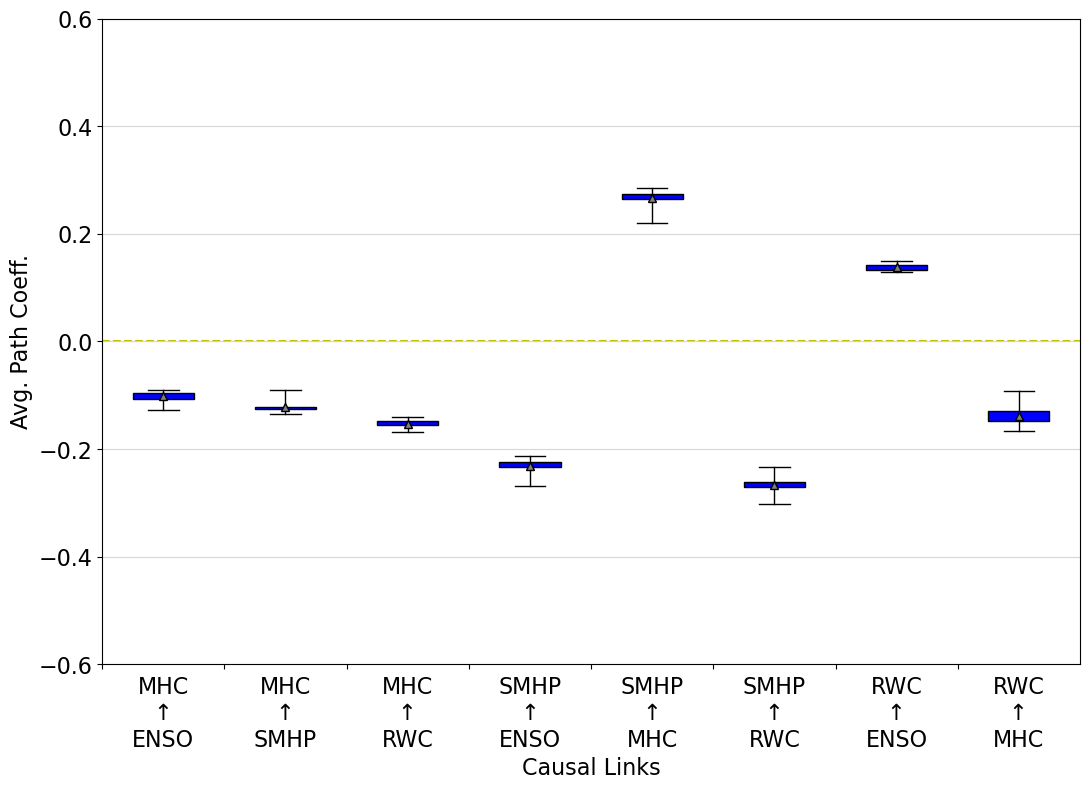

mean values: (('ENSO', 0.1485454151693011), ('MHC', 0.12824598372368406), ('SMHP', 0.04242988314927325), ('RWC', 0.14127222954011528))
[[0.14854542 0.12824598 0.04242988 0.14127223]]


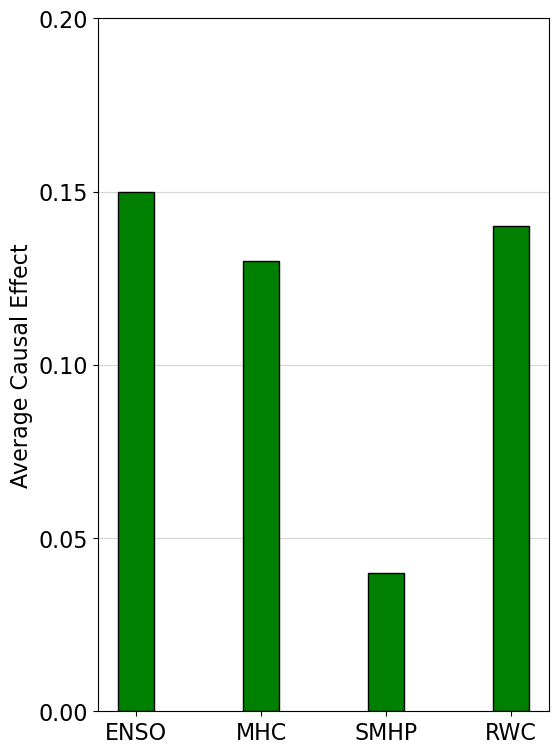

mean values: (('ENSO', 0.0013582636117496834), ('MHC', 0.12189417338844052), ('SMHP', 0.2504935452861024), ('RWC', 0.08674752929608116))
[[0.00135826 0.12189417 0.25049355 0.08674753]]


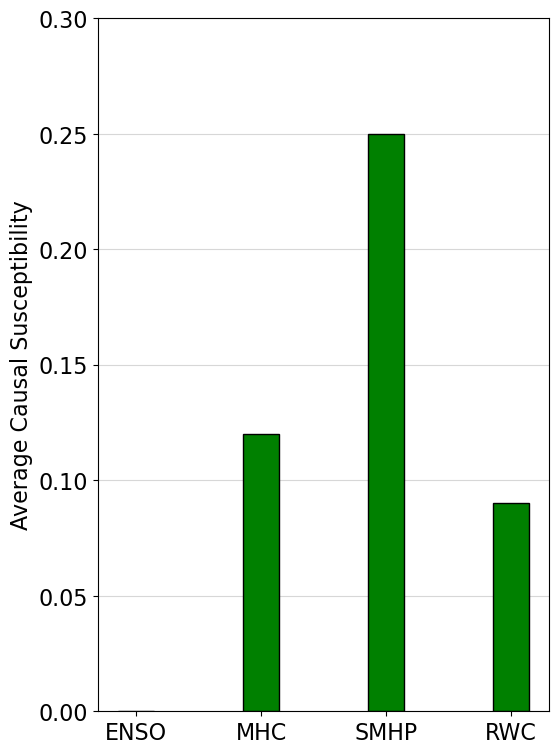

In [12]:
dpc_plotting = DataProcessingClass()

all_causal_links = dpc_plotting.get_links_formatted()

# Delete unwanted links
del all_causal_links['ENSO\n ↑ \nRWC']
del all_causal_links['RWC\n ↑ \nSMHP']

dpc_plotting.plot_coeffs_distribution(all_causal_links, fn='causal_links_dist', save=False)
dpc_plotting.plot_metrics_chart_plots(fname='causal_metrics', save=False)